___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Text(0.5, 0, 'FICO')

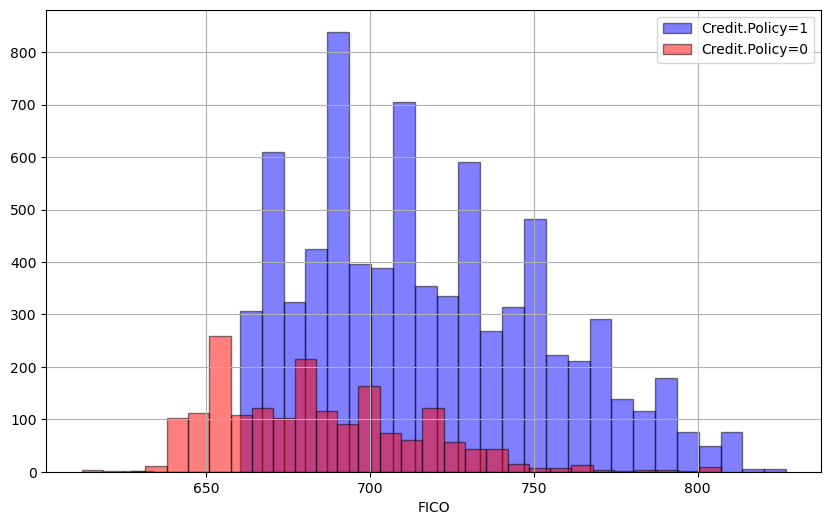

In [8]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                        bins=30,label='Credit.Policy=1',
                                       grid=True, edgecolor='black')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                        bins=30,label='Credit.Policy=0',
                                       grid=True, edgecolor='black')
plt.legend()
plt.xlabel('FICO')

In the dataset, there are more individuals with a credit policy equals to one than those with a credit policy equals to zero. It should be noted that anyone with a FICO score below approximately 660 will automatically not meet the credit underwirting criteria of LendingClub.com.

Text(0.5, 0, 'FICO')

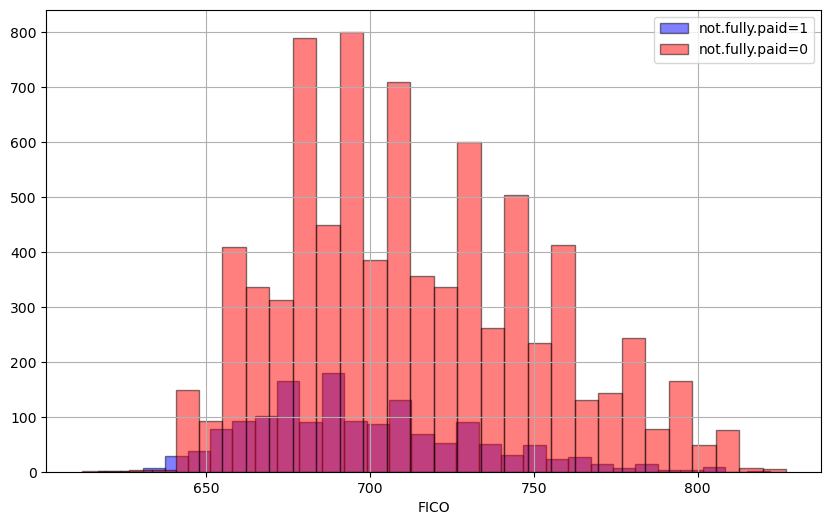

In [10]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                         bins=30,label='not.fully.paid=1',
                                        grid=True, edgecolor='black')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                         bins=30,label='not.fully.paid=0',
                                        grid=True, edgecolor='black')
plt.legend()
plt.xlabel('FICO')

Majority of people in the dataset fully pay off these loans. The distribution of individuals who were not fully paid(not.fully.paid=1) and those who were fully paid(not.fully.paid=0) is relatively similar. Unlike previous credit policy, it dose not appear to have the same cut off based on FICO score. Also, certain points in the dataset exhibit a larger distribution due to the charateristics of FICO scoring.

<AxesSubplot:xlabel='purpose', ylabel='count'>

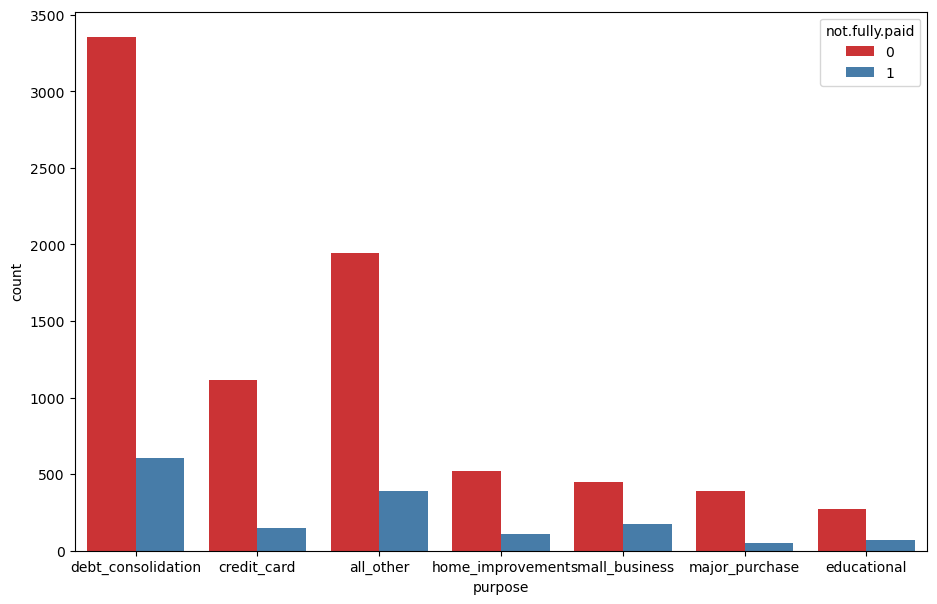

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(data=df, x='purpose', hue='not.fully.paid', palette='Set1')

Debt consolidation is the most popular reason cited for wanting a loan. Interestingly, the ratio between the number of loans that were not fully paid and those that were fully paid appears to be similar across all the reasons for borrowing. This suggests that the repayment behavior does not significantly vary based on the stated purpose of the loan.

<Figure size 300x400 with 0 Axes>

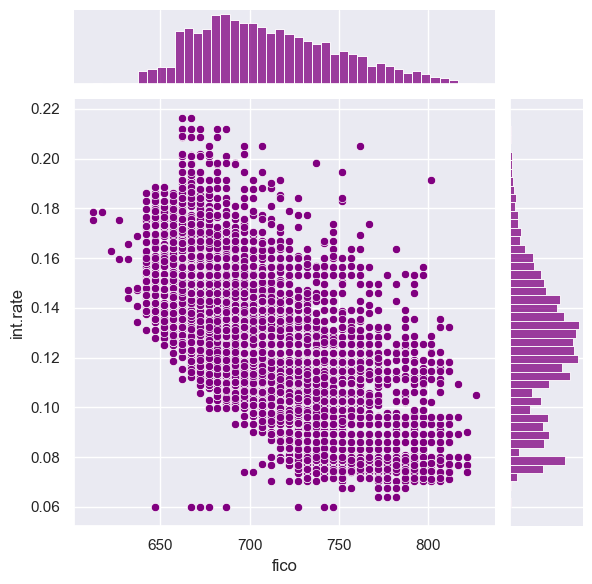

In [20]:
plt.figure(figsize=(3,4))
sns.set_style("darkgrid")
sns.jointplot(data=df,x='fico',y='int.rate', color='purple')

As your FICO score increases, it indicates better creditworthiness, which in turn leads to loans with lower interest rates. A higher FICO score is generally associated with a lower risk profile, and lenders tend to offer more favorable interest rates to borrowers with higher credit scores.

<Figure size 1100x700 with 0 Axes>

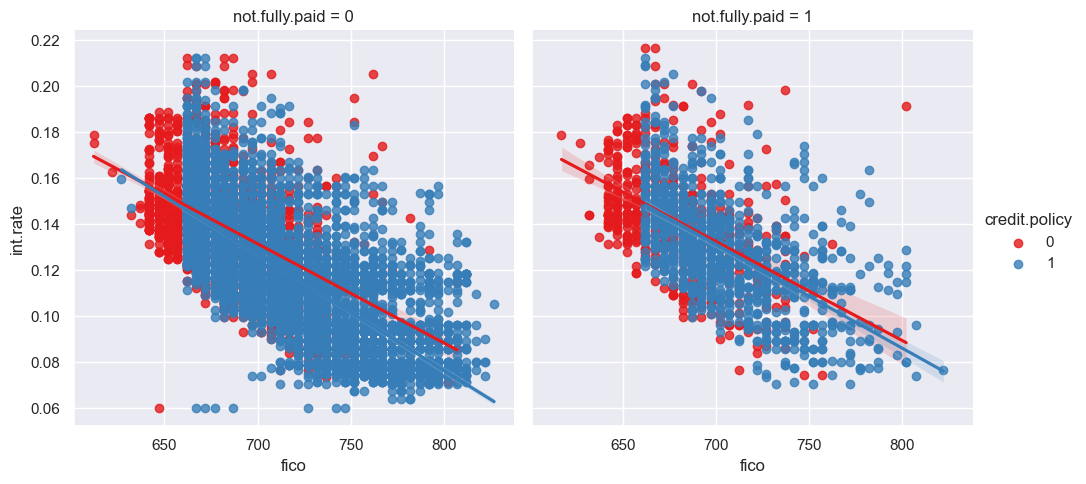

In [22]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico', y='int.rate', hue='credit.policy', data=df,
          col='not.fully.paid', palette='Set1')

The behavior remains relatively similar regardless of whether the loan was fully paid off or the credit policy was denied. In other words, there doesn't seem to be a significant difference in the patterns or characteristics between these two scenarios. The factors influencing loan repayment and credit policy approval appear to have consistent behavior across both cases.

# Setting up the Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

In [23]:
cat_feats = ['purpose']

In [24]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [25]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier()

In [30]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [43]:
predictions = dtree.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.73      0.74      2874



In [46]:
print(confusion_matrix(y_test,predictions))

[[1994  437]
 [ 333  110]]


## Training the Random Forest model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(n_estimators=300)

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation

In [49]:
predictions = rfc.predict(X_test)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.42      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



In [51]:
print(confusion_matrix(y_test,predictions))

[[2420   11]
 [ 435    8]]


## Conclusion

The precision, recall, and F1-score for the class 1 have improved when using a single decision tree compared to the random forest. Therefore, the choice between using a decision tree or random forest depends on the specific metric you are trying to optimize. However, in terms of overall accuracy, the random forest model tends to have higher accuracy compared to a single decision tree.